# Classifying Mr. Beast YouTube Videos

In this project, we will classify Mr. Beast's YouTube videos into specific categories based on their content. The categories we will use are:
- **Giving out cash**
- **Vs Challeges**
- **Challenges**
- **Survival**
- **Experiments** (for videos that involve extreme scenarios, like "I Didn’t Eat Food For 30 Days")
- **Giveaways** (for videos specifically about gifting or giving away items, like "I Built 100 Houses And Gave Them Away!")
- **Contests** (for videos that involve competition without monetary rewards)
- **Other** (for videos that don’t fit into the above categories)

## Data Loading
Let's start by loading the data from the CSV file.

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('mrbeast_videos1.csv')

# Display the first few rows of the dataframe
df.head()


,Title,Description,Likes,Comments,Views,URL,Length
0,7 Days Exploring An Underground City,This salt mine is the coolest underground city...,2561697,24777,74099527,https://www.youtube.com/watch?v=bn0Kh9c4Zv4,0:20:35
1,"Men Vs Women Survive The Wilderness For $500,000",Some of these strategies were wild!\nWet thing...,3587387,48047,119064843,https://www.youtube.com/watch?v=aRcUVhVlSHg,0:31:47
2,7 Days Stranded In A Cave,I didn’t think surviving in a cave would be th...,4231120,96130,122136852,https://www.youtube.com/watch?v=ndAQfTzlVjc,0:17:58
3,"Survive 100 Days In Nuclear Bunker, Win $500,000","This video was really fun to make, I hope you ...",5361910,85548,200366321,https://www.youtube.com/watch?v=UPrkC1LdlLY,0:32:20
4,"50 YouTubers Fight For $1,000,000",I can’t believe how intense this video got\nTh...,8771975,350874,260992579,https://www.youtube.com/watch?v=4SNThp0YiU4,0:41:27


## Data Exploration
Now, let's explore the dataset to understand its structure and contents.


In [2]:
# Display the shape and columns of the dataframe
df.shape, df.columns

((68, 7),
 Index(['Title', 'Description', 'Likes', 'Comments', 'Views', 'URL', 'Length'], dtype='object'))

## Data Preprocessing
We will need to preprocess the data, particularly the 'Title' and 'Description' columns, to prepare them for classification. This may involve text cleaning, tokenization and more.

Let's define a function to clean the text.


In [3]:
import re

def clean_text(text):
    """Clean the input text by removing special characters and extra spaces."""
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()    # Remove extra spaces
    return text

# Apply the cleaning function to the Title and Description
df['Cleaned_Title'] = df['Title'].apply(clean_text)
df['Cleaned_Description'] = df['Description'].apply(clean_text)

# Display the cleaned data
df[['Cleaned_Title', 'Cleaned_Description']].head()


,Cleaned_Title,Cleaned_Description
0,7 Days Exploring An Underground City,This salt mine is the coolest underground city...
1,Men Vs Women Survive The Wilderness For 500000,Some of these strategies were wild Wet things ...
2,7 Days Stranded In A Cave,I didnt think surviving in a cave would be tha...
3,Survive 100 Days In Nuclear Bunker Win 500000,This video was really fun to make I hope you e...
4,50 YouTubers Fight For 1000000,I cant believe how intense this video got The ...


## Classification Logic
We will classify the videos based on keywords in the cleaned titles and descriptions. Let's define a function to classify the videos.


In [27]:
def classify_video(title, description):
    """Classify the video based on title and description."""
    title = title.lower()
    description = description.lower()

    # Check for "vs" scenarios
    if 'vs' in title or 'vs' in description:
        return 'Vs Challenge'
    
    # Keyword-based classification for cash giveaways
    if any(keyword in title or keyword in description for keyword in [
        'cash', 'win money', 'cash prize', 'giveaway', 'contest', 'prize money', '$']):
        return 'Giving Out Cash'
    
    elif any(keyword in title or keyword in description for keyword in [
        'challenge', 'challenges', 'extreme hide and seek', 'last to leave', 'last to stop', 'protect']):
        return 'Challenges'
    
    # Survival classification
    elif any(keyword in title or keyword in description for keyword in [
        'survive', 'survival', 'stranded', 'day', 'days', 'hours']):
        return 'Survival'
    
    elif any(keyword in title or keyword in description for keyword in [
        'built', 'made', 'experiment', 'test']):
        return 'Experiments'
    
    elif 'giveaway' in title or 'giveaway' in description:
        return 'Giveaways'
    
    elif 'contest' in title or 'competition' in description:
        return 'Contests'
    
    else:
        return 'Other'

# Apply the classification function
df['Category'] = df.apply(lambda row: classify_video(row['Cleaned_Title'], row['Cleaned_Description']), axis=1)

# Display the categorized data
df[['Title', 'Category']].head()


,Title,Category
0,7 Days Exploring An Underground City,Survival
1,"Men Vs Women Survive The Wilderness For $500,000",Vs Challenge
2,7 Days Stranded In A Cave,Survival
3,"Survive 100 Days In Nuclear Bunker, Win $500,000",Challenges
4,"50 YouTubers Fight For $1,000,000",Other


## Results
Let's look at the distribution of the categories.

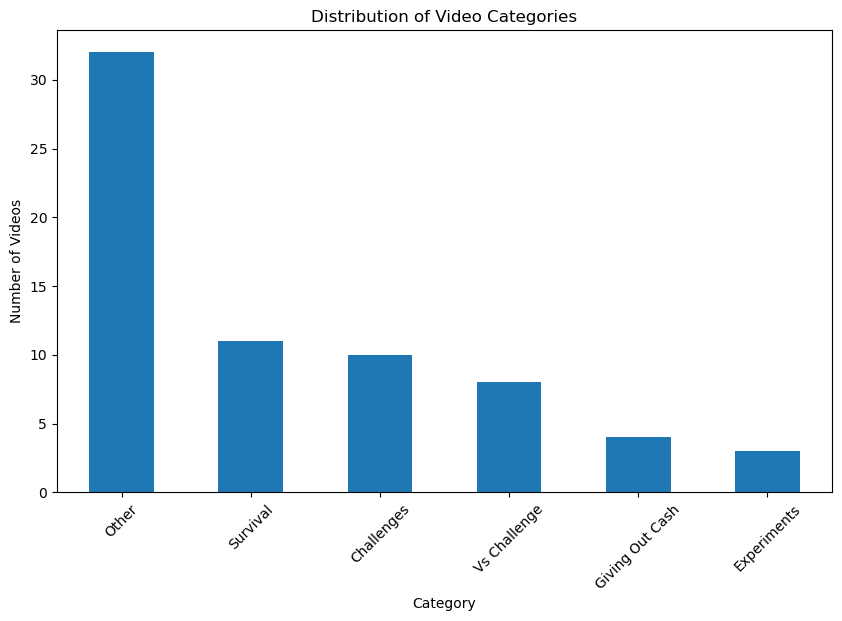

In [28]:
# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Video Categories')
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()
